In [81]:
#Import libraries
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC, SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier, AdaBoostClassifier, VotingClassifier
from sklearn.model_selection import KFold 
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, precision_score, f1_score, recall_score
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import ConfusionMatrixDisplay

In [82]:
#Import train data
train = pd.read_csv("medical_tc_train.csv", engine='python', encoding='UTF-8')
vec = TfidfVectorizer()
x_train = vec.fit_transform(train['medical_abstract'].values.astype('U'))
y_train = train['condition_label']

In [83]:
#Import test data
test = pd.read_csv("medical_tc_test.csv", engine='python', encoding='UTF-8')
x_test = vec.transform(test['medical_abstract'].values.astype('U'))
y_test = test['condition_label']

F1 of Logistic Regression: 0.525623268698061
Classification report of Logistic Regression:
              precision    recall  f1-score   support

           1       0.66      0.69      0.67       633
           2       0.45      0.35      0.40       299
           3       0.52      0.40      0.45       385
           4       0.61      0.60      0.61       610
           5       0.42      0.48      0.45       961

    accuracy                           0.53      2888
   macro avg       0.53      0.50      0.51      2888
weighted avg       0.53      0.53      0.52      2888



<Figure size 500x300 with 0 Axes>

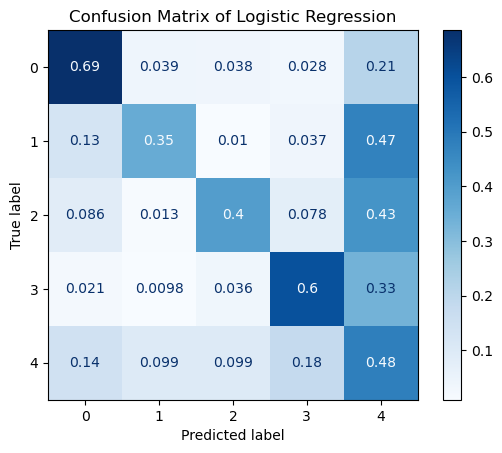

In [84]:
#Logistic Regression
lr = LogisticRegression(C = 2, max_iter = 1000, n_jobs=-1)
lr.fit(x_train, y_train)
y_pred1 = lr.predict(x_test)

print("F1 of Logistic Regression: " + str(f1_score(y_test,y_pred1, average='micro')))
print("Classification report of Logistic Regression:")
print(classification_report(y_test, y_pred1))

plt.figure(figsize=(5, 3))
conf_matrix = confusion_matrix(y_test, y_pred1)
conf_matrix_percentage = conf_matrix / conf_matrix.sum(axis=1, keepdims=True)
ConfusionMatrixDisplay(conf_matrix_percentage).plot(cmap='Blues')
plt.title("Confusion Matrix of Logistic Regression")
plt.show()

F1 of Support Vector Machine: 0.5024238227146814
Classification report of Support Vector Machine:
              precision    recall  f1-score   support

           1       0.63      0.65      0.64       633
           2       0.41      0.39      0.40       299
           3       0.49      0.42      0.45       385
           4       0.58      0.60      0.59       610
           5       0.40      0.41      0.41       961

    accuracy                           0.50      2888
   macro avg       0.50      0.49      0.50      2888
weighted avg       0.50      0.50      0.50      2888



<Figure size 500x300 with 0 Axes>

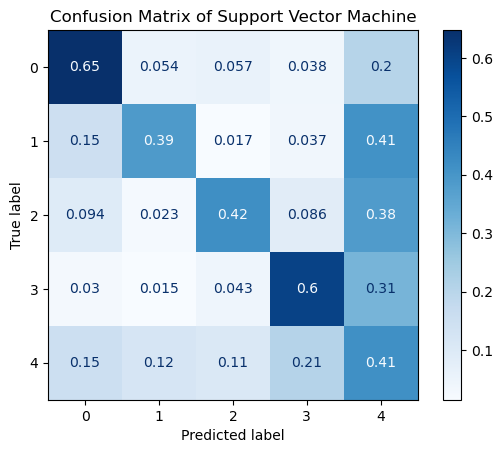

In [85]:
#Support Vector Machine
svc = LinearSVC()
svc.fit(x_train, y_train)
y_pred2 = svc.predict(x_test)

print("F1 of Support Vector Machine: "+str(f1_score(y_test,y_pred2, average='micro')))
print("Classification report of Support Vector Machine:")
print(classification_report(y_test, y_pred2))

plt.figure(figsize=(5, 3))
conf_matrix = confusion_matrix(y_test, y_pred2)
conf_matrix_percentage = conf_matrix / conf_matrix.sum(axis=1, keepdims=True)
ConfusionMatrixDisplay(conf_matrix_percentage).plot(cmap='Blues')
plt.title("Confusion Matrix of Support Vector Machine")
plt.show()

F1 of Naive Bayes: 0.4878808864265928
Classification report of Naive Bayes:
              precision    recall  f1-score   support

           1       0.71      0.56      0.63       633
           2       1.00      0.00      0.01       299
           3       1.00      0.01      0.01       385
           4       0.69      0.49      0.57       610
           5       0.39      0.78      0.52       961

    accuracy                           0.49      2888
   macro avg       0.76      0.37      0.35      2888
weighted avg       0.67      0.49      0.43      2888



<Figure size 500x300 with 0 Axes>

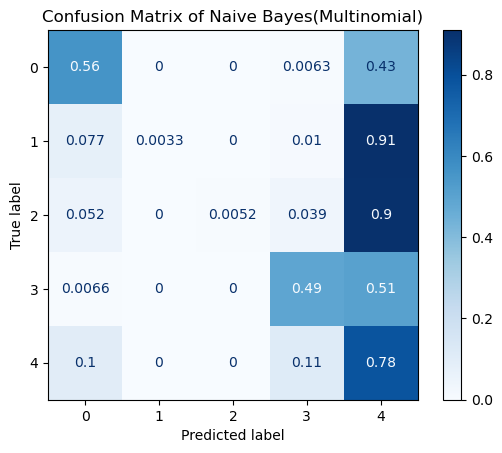

In [86]:
#Naive Bayes(Multinomial)
mnb = MultinomialNB()
mnb.fit(x_train, y_train)
y_pred3 = mnb.predict(x_test)

print("F1 of Naive Bayes: "+str(f1_score(y_test,y_pred3, average='micro')))
print("Classification report of Naive Bayes:")
print(classification_report(y_test, y_pred3))

plt.figure(figsize=(5, 3))
conf_matrix = confusion_matrix(y_test, y_pred3)
conf_matrix_percentage = conf_matrix / conf_matrix.sum(axis=1, keepdims=True)
ConfusionMatrixDisplay(conf_matrix_percentage).plot(cmap='Blues')
plt.title("Confusion Matrix of Naive Bayes(Multinomial)")
plt.show()

F1 of Random forest: 0.538781163434903
Classification report of Random forest:
              precision    recall  f1-score   support

           1       0.63      0.76      0.69       633
           2       0.43      0.61      0.50       299
           3       0.44      0.70      0.54       385
           4       0.61      0.77      0.68       610
           5       0.48      0.16      0.23       961

    accuracy                           0.54      2888
   macro avg       0.52      0.60      0.53      2888
weighted avg       0.53      0.54      0.50      2888



<Figure size 500x300 with 0 Axes>

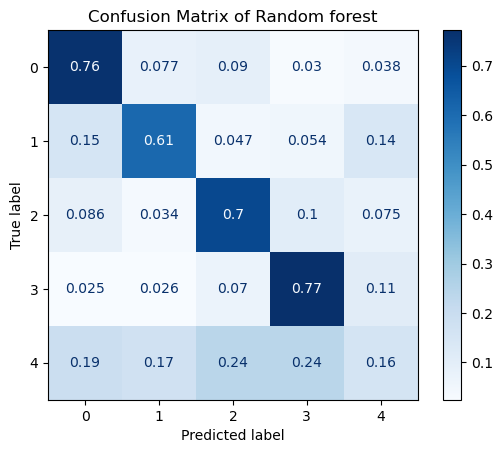

In [87]:
#Random forest
rfc = RandomForestClassifier(n_estimators=300, max_depth=15, random_state=42, class_weight='balanced')
rfc.fit(x_train, y_train)
y_pred4 = rfc.predict(x_test)

print("F1 of Random forest: "+str(f1_score(y_test,y_pred4, average='micro')))
print("Classification report of Random forest:")
print(classification_report(y_test, y_pred4))

plt.figure(figsize=(5, 3))
conf_matrix = confusion_matrix(y_test, y_pred4)
conf_matrix_percentage = conf_matrix / conf_matrix.sum(axis=1, keepdims=True)
ConfusionMatrixDisplay(conf_matrix_percentage).plot(cmap='Blues')
plt.title("Confusion Matrix of Random forest")
plt.show()

      Iter       Train Loss   Remaining Time 
         1           1.4507            4.88m
         2           1.3927            4.99m
         3           1.3466            4.92m
         4           1.3075            4.84m
         5           1.2747            4.78m
         6           1.2452            4.69m
         7           1.2195            4.63m
         8           1.1976            4.62m
         9           1.1780            4.56m
        10           1.1593            4.49m
        20           1.0391            3.96m
        30           0.9702            3.48m
        40           0.9216            2.96m
        50           0.8866            2.46m
        60           0.8566            1.96m
        70           0.8317            1.46m
        80           0.8089           58.36s
        90           0.7910           29.09s
       100           0.7730            0.00s
F1 of Gradient Boosting Classifier: 0.5238919667590027
Classification report of Gradient Boosting C

<Figure size 500x300 with 0 Axes>

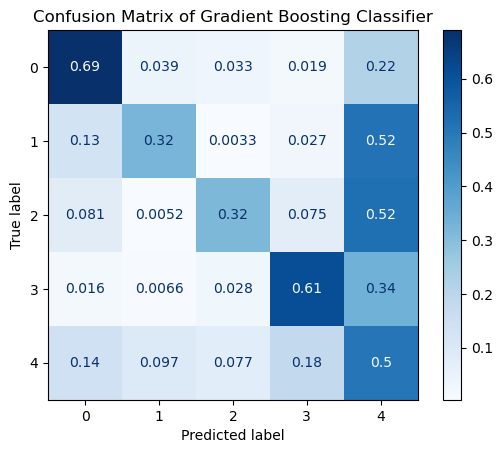

In [88]:
#Gradient Boosting Classifier
gbc = GradientBoostingClassifier(n_estimators=100, max_features=1.0, max_depth=4, random_state=1, verbose=1)
gbc.fit(x_train, y_train)
y_pred5 = gbc.predict(x_test)

print("F1 of Gradient Boosting Classifier: "+str(f1_score(y_test,y_pred5, average='micro')))
print("Classification report of Gradient Boosting Classifier:")
print(classification_report(y_test, y_pred5))

plt.figure(figsize=(5, 3))
conf_matrix = confusion_matrix(y_test, y_pred5)
conf_matrix_percentage = conf_matrix / conf_matrix.sum(axis=1, keepdims=True)
ConfusionMatrixDisplay(conf_matrix_percentage).plot(cmap='Blues')
plt.title("Confusion Matrix of Gradient Boosting Classifier")
plt.show()

F1 of Ensemble Classifier: 0.5006925207756233
Classification report of Ensemble Classifier:
              precision    recall  f1-score   support

           1       0.67      0.67      0.67       633
           2       0.39      0.22      0.28       299
           3       0.46      0.25      0.33       385
           4       0.61      0.57      0.59       610
           5       0.39      0.53      0.45       961

    accuracy                           0.50      2888
   macro avg       0.51      0.45      0.46      2888
weighted avg       0.51      0.50      0.49      2888



<Figure size 500x300 with 0 Axes>

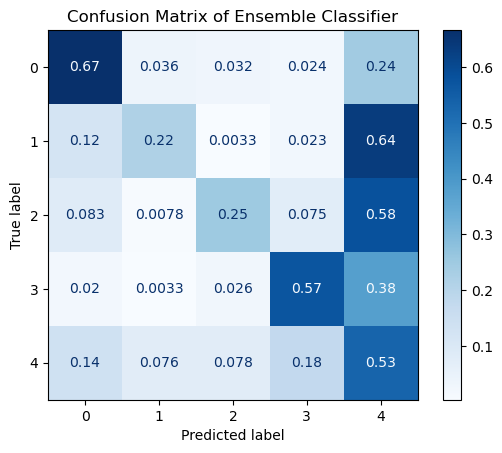

In [89]:
#Ensemble Classifier
mnb = MultinomialNB()
rfc= RandomForestClassifier(n_estimators=1000, max_depth=12, random_state=42)
lr = LogisticRegression(C = 2, max_iter = 1000, n_jobs=-1)
svc = SVC(probability=True)
ec=VotingClassifier(estimators=[('Multinominal NB', mnb), ('Random Forest', rfc),('Logistic Regression',lr),('Support Vector Machine',svc)], voting='soft', weights=[1,2,3,4]) 
ec.fit(x_train,y_train)                                                 
y_pred6 = ec.predict(x_test)

print("F1 of Ensemble Classifier: "+str(f1_score(y_test,y_pred6, average='micro')))
print("Classification report of Ensemble Classifier:")
print(classification_report(y_test, y_pred6))

plt.figure(figsize=(5, 3))
conf_matrix = confusion_matrix(y_test, y_pred6)
conf_matrix_percentage = conf_matrix / conf_matrix.sum(axis=1, keepdims=True)
ConfusionMatrixDisplay(conf_matrix_percentage).plot(cmap='Blues')
plt.title("Confusion Matrix of Ensemble Classifier")
plt.show()

F1 of AdaBoost: 0.49653739612188363
Classification report of AdaBoost with Random Forest Classifier:
              precision    recall  f1-score   support

           1       0.69      0.58      0.63       633
           2       0.43      0.23      0.30       299
           3       0.52      0.19      0.28       385
           4       0.64      0.55      0.59       610
           5       0.38      0.61      0.47       961

    accuracy                           0.50      2888
   macro avg       0.53      0.43      0.46      2888
weighted avg       0.53      0.50      0.49      2888



<Figure size 500x300 with 0 Axes>

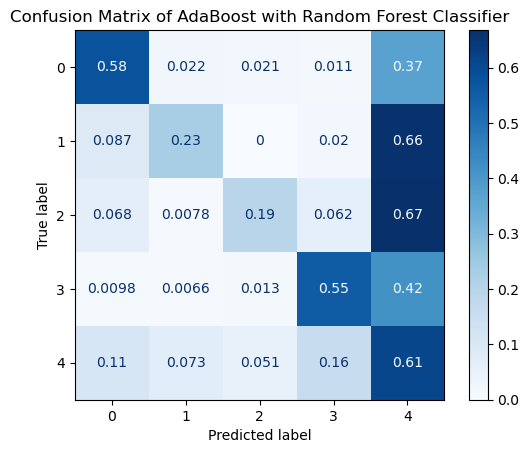

In [90]:
#AdaBoost with Random Forest Classifier
rfc = RandomForestClassifier(n_estimators=100, max_depth=9, random_state=0)
abc= AdaBoostClassifier(base_estimator=rfc, learning_rate=0.2, n_estimators=100)
abc.fit(x_train, y_train)                                                   
y_pred7= abc.predict(x_test)

print("F1 of AdaBoost: "+str(f1_score(y_test,y_pred7, average='micro')))
print("Classification report of AdaBoost with Random Forest Classifier:")
print(classification_report(y_test, y_pred7))

plt.figure(figsize=(5, 3))
conf_matrix = confusion_matrix(y_test, y_pred7)
conf_matrix_percentage = conf_matrix / conf_matrix.sum(axis=1, keepdims=True)
ConfusionMatrixDisplay(conf_matrix_percentage).plot(cmap='Blues')
plt.title("Confusion Matrix of AdaBoost with Random Forest Classifier")
plt.show()